# Sentiment Analysis with Deep Learning

## About Data

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.
For more dataset information, please go through the following link,

http://ai.stanford.edu/~amaas/data/sentiment/

## Import Dependecies

In [466]:
import numpy as np
import pandas as pd

In [467]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding, CuDNNGRU
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [468]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import sent_tokenize, word_tokenize, WordPunctTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

## Define Data

In [469]:
dataset = pd.read_csv('imdb.csv')

In [470]:
np.sum(dataset.isnull().any(axis=1))

0

In [471]:
dataset.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [472]:
dataset.review[2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

## Clean Data

In [473]:
dataset[dataset.isnull().any(axis=1)]

Empty DataFrame
Columns: [review, sentiment]
Index: []

In [474]:
np.sum(dataset.isnull().any(axis=1))

0

In [475]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
review       50000 non-null object
sentiment    50000 non-null object
dtypes: object(2)
memory usage: 781.4+ KB


In [476]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
dataset['review']=dataset['review'].apply(denoise_text)

In [477]:
dataset.review[2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

test of creating new dataset from current dataset

In [381]:
# reviews = []
# sentiments = []
# for row,i in zip(dataset['review'],dataset['sentiment']):
#     for sent in sent_tokenize(row):
#         reviews.append(sent)
#         sentiments.append(i)

In [382]:
# data = {'review':reviews, 'sentiment':sentiments}
# new_dataset = pd.DataFrame(data=data)

In [383]:
# new_dataset        

In [384]:
# new_dataset['sentiment'] = [1 if i=='positive' else 0 for i in new_dataset['sentiment']]

In [385]:
# new_dataset

## Data Visualition

Text(0.5,1,'Distribution of Positive and Negative')

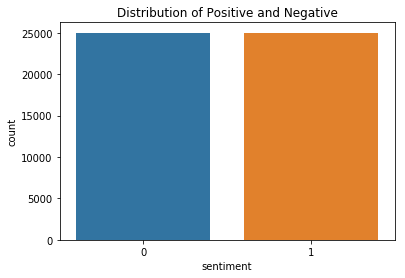

In [393]:
#plotting graph for distribution

sns.countplot(x='sentiment', data=dataset)
dataset.loc[:,'sentiment'].value_counts()
plt.title('Distribution of Positive and Negative')

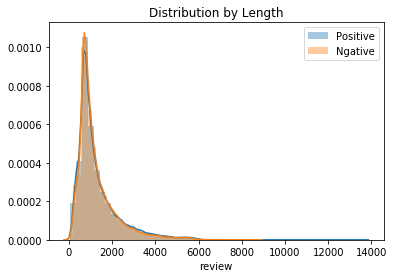

In [394]:
# plotting graph by length

pos = dataset[dataset['sentiment'] == 1]['review'].str.len()
sns.distplot(pos, label='Positive')

neg = dataset[dataset['sentiment'] == 0]['review'].str.len()
sns.distplot(neg, label='Ngative')

plt.title('Distribution by Length')
plt.legend()

In [395]:
count1 = Counter(" ".join(dataset[dataset['sentiment'] == 1]['review']).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of pos", 1: "count"})

count2 = Counter(" ".join(dataset[dataset['sentiment'] == 0]['review']).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of neg", 1: "count_"})

#### Graph for top 30 words of positive

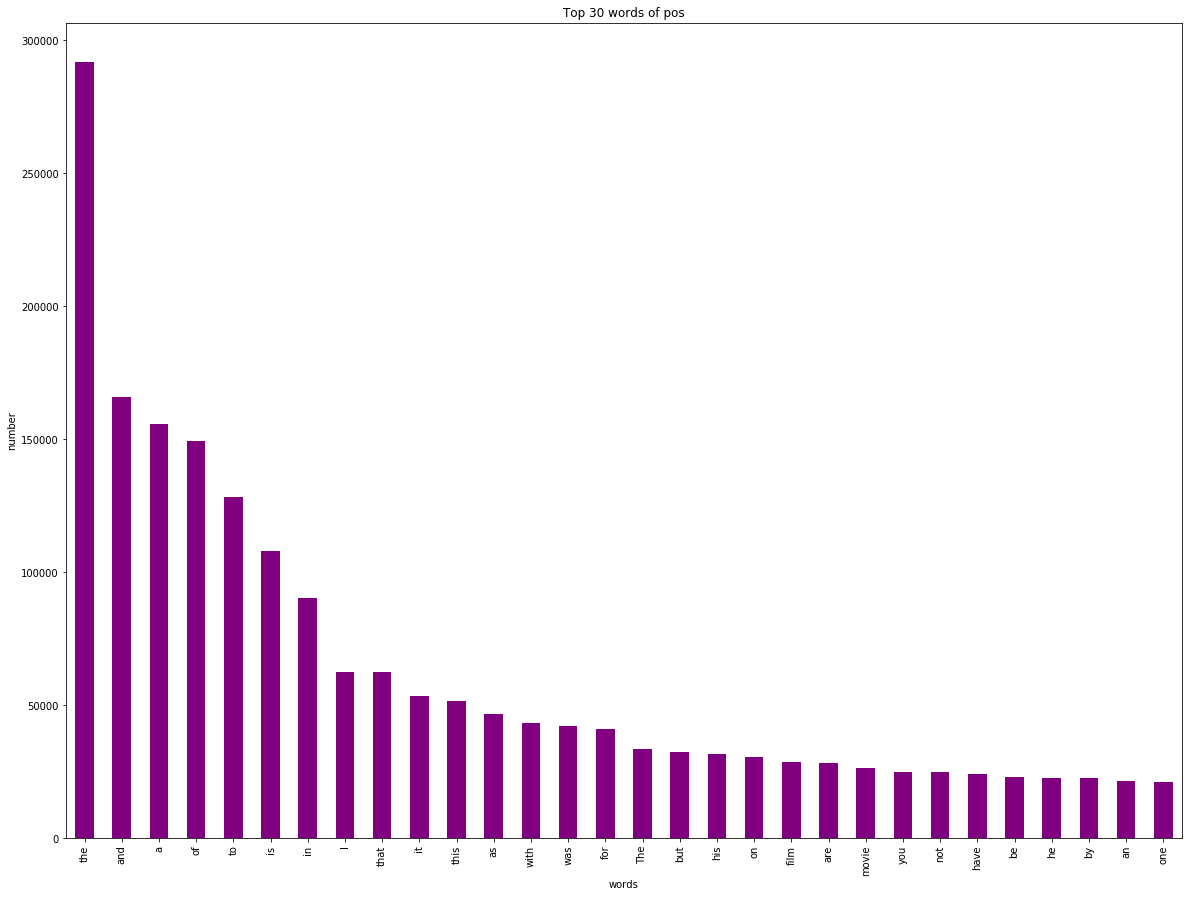

In [396]:
data1.plot.bar(legend = False, color='purple', figsize=(20,15))
y_pos = np.arange(len(data1["words of pos"]))
plt.xticks(y_pos, data1["words of pos"])
plt.title('Top 30 words of pos')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

#### Graph for top 30 words of negative

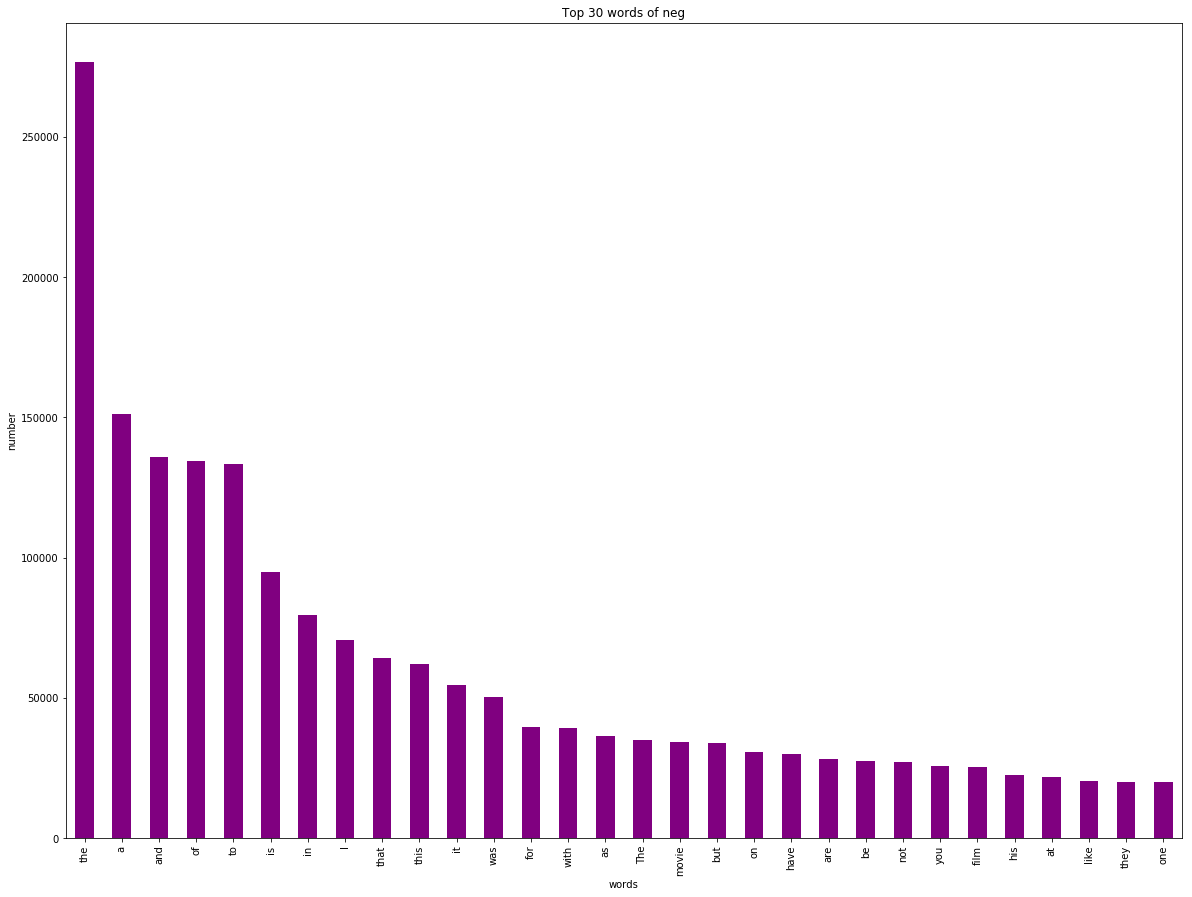

In [397]:
data2.plot.bar(legend = False, color='purple', figsize=(20,15))
y_pos = np.arange(len(data2["words of neg"]))
plt.xticks(y_pos, data2["words of neg"])
plt.title('Top 30 words of neg')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

### Word Cloud

In [398]:
all_string = []
for t in dataset.review:
    all_string.append(t)
all_string = pd.Series(all_string).str.cat(sep=' ')

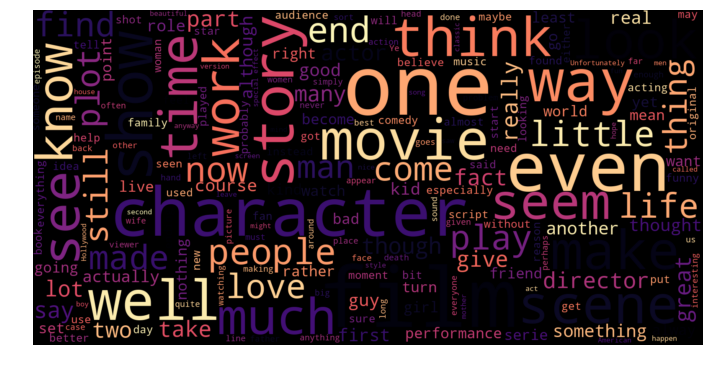

In [399]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(all_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Split Data

In [479]:
dataset

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. The filming tec...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [480]:
dataset['sentiment'] = [1 if i=='positive' else 0 for i in dataset['sentiment']]

In [481]:
dataset

review  sentiment
0      One of the other reviewers has mentioned that ...          1
1      A wonderful little production. The filming tec...          1
2      I thought this was a wonderful way to spend ti...          1
3      Basically there's a family where a little boy ...          0
4      Petter Mattei's "Love in the Time of Money" is...          1
...                                                  ...        ...
49995  I thought this movie did a down right good job...          1
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0
49997  I am a Catholic taught in parochial elementary...          0
49998  I'm going to have to disagree with the previou...          0
49999  No one expects the Star Trek movies to be high...          0

[50000 rows x 2 columns]

In [482]:
target = dataset['sentiment'].values.tolist()
data = dataset['review'].values.tolist()

In [483]:
cutoff = int(len(data) * 0.80)
x_train, x_test = data[:cutoff], data[cutoff:]
y_train, y_test = target[:cutoff], target[cutoff:]

In [484]:
x_train[500]

"What an empty and lack lustre rendition of the classic novel. I do wish people would stop messing about with classics when they clearly have no idea of the real intention or point of the original. This version is no different. I felt that the Ralph Fiennes version is much worse though as the casting of Juliette brioche as Kathy has got to be the worst casting decision EVER...anyway back to this version. It aims to make the story relevant to a contemporary setting and in a musical style. It succeeds in both but high art it is nit. Throwaway viewing for a rainy day maybe...The direction was average and the editing abysmal. Worse than the old Quincy. Deepak Verma does a great turn as Hindley and is in fact one of Britains wasted talents. The part of Heath was played with great charm and belief and I think that the casting is the strongest point of this project. Although a more talented director would have made better use of the facilities he had. Its clear that he was a director for hire

In [485]:
x_train[800]

"If you want just about everything you want to know about WWII from multiple perspectives, this DVD delivers, you WILL learn new things guaranteed, so much so that you won't need any other documentary's on the subject. Get this, watch it, learn from it. Good for school use as well. As a bonus, watch this with Tora tora tora, saving private ryan, patton, band of brothers, a bridge too far, the longest day and other WWII epics along with this to make your knowledge of WWII even more complete. Sir Laurence Oliver's voice adds to the overall atmosphere of each episode in this 26 part series. Seriously you won't find a better WWII documentary set on the subject. PERFECT 10!!!"

In [486]:
y_train[800]

1

In [487]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)

In [488]:
tokenizer.fit_on_texts(data)

In [489]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'in': 7,
 'it': 8,
 'i': 9,
 'this': 10,
 'that': 11,
 'was': 12,
 'as': 13,
 'for': 14,
 'with': 15,
 'movie': 16,
 'but': 17,
 'film': 18,
 'on': 19,
 'not': 20,
 'you': 21,
 'are': 22,
 'his': 23,
 'have': 24,
 'be': 25,
 'one': 26,
 'he': 27,
 'all': 28,
 'at': 29,
 'by': 30,
 'an': 31,
 'they': 32,
 'so': 33,
 'who': 34,
 'from': 35,
 'like': 36,
 'or': 37,
 'just': 38,
 'her': 39,
 'about': 40,
 'out': 41,
 'if': 42,
 "it's": 43,
 'has': 44,
 'there': 45,
 'some': 46,
 'what': 47,
 'good': 48,
 'when': 49,
 'more': 50,
 'very': 51,
 'up': 52,
 'no': 53,
 'time': 54,
 'my': 55,
 'even': 56,
 'would': 57,
 'she': 58,
 'which': 59,
 'only': 60,
 'really': 61,
 'see': 62,
 'story': 63,
 'their': 64,
 'had': 65,
 'can': 66,
 'me': 67,
 'well': 68,
 'were': 69,
 'than': 70,
 'much': 71,
 'we': 72,
 'bad': 73,
 'been': 74,
 'get': 75,
 'do': 76,
 'great': 77,
 'other': 78,
 'will': 79,
 'also': 80,
 'into': 81,
 'people': 82,

In [490]:
x_train_tokens = tokenizer.texts_to_sequences(x_train)

In [491]:
x_train[800]

"If you want just about everything you want to know about WWII from multiple perspectives, this DVD delivers, you WILL learn new things guaranteed, so much so that you won't need any other documentary's on the subject. Get this, watch it, learn from it. Good for school use as well. As a bonus, watch this with Tora tora tora, saving private ryan, patton, band of brothers, a bridge too far, the longest day and other WWII epics along with this to make your knowledge of WWII even more complete. Sir Laurence Oliver's voice adds to the overall atmosphere of each episode in this 26 part series. Seriously you won't find a better WWII documentary set on the subject. PERFECT 10!!!"

In [492]:
print(x_train_tokens[800])

[42, 21, 177, 38, 40, 267, 21, 177, 5, 117, 40, 2721, 35, 2622, 8175, 10, 265, 1535, 21, 79, 854, 167, 176, 5785, 33, 71, 33, 11, 21, 507, 360, 98, 78, 19, 1, 801, 75, 10, 102, 8, 854, 35, 8, 48, 14, 367, 356, 13, 68, 13, 3, 4338, 102, 10, 15, 1905, 1971, 1733, 9364, 1142, 4, 1176, 3, 3178, 95, 224, 1, 6192, 253, 2, 78, 2721, 7456, 340, 15, 10, 5, 93, 124, 1828, 4, 2721, 56, 50, 596, 2572, 6445, 548, 1531, 5, 1, 441, 851, 4, 251, 397, 7, 10, 8091, 171, 203, 610, 21, 507, 164, 3, 125, 2721, 639, 266, 19, 1, 801, 398, 159]


In [493]:
x_test_tokens = tokenizer.texts_to_sequences(x_test)

In [494]:
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

In [495]:
np.mean(num_tokens)

217.12032

In [496]:
np.max(num_tokens)

2123

In [497]:
np.argmax(num_tokens)

40521

In [498]:
x_train[21941]

"This is one of the best films I've seen in the last years.Belmonndo and Deneuve shine in their respective roles, he as a naive plantation owner and she as an enigmatic trickster.Words won't do this masterpiece justice,suffice it to say that this is a movie that explores the darker side of love and the pain,humiliation and capacity for self-delusion that go with it, although it's dressed as a film noir. Forget that feeble remake with Jolie and Banderas, see the genuine artticle instead and treat yourselves to some moments of great cinematic beauty."

In [563]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

533

In [564]:
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.94512

In [565]:
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens)

In [566]:
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens)

In [567]:
x_train_pad.shape

(40000, 533)

In [568]:
x_test_pad.shape

(10000, 533)

In [569]:
np.array(x_train_tokens[800])

array([  42,   21,  177,   38,   40,  267,   21,  177,    5,  117,   40,
       2721,   35, 2622, 8175,   10,  265, 1535,   21,   79,  854,  167,
        176, 5785,   33,   71,   33,   11,   21,  507,  360,   98,   78,
         19,    1,  801,   75,   10,  102,    8,  854,   35,    8,   48,
         14,  367,  356,   13,   68,   13,    3, 4338,  102,   10,   15,
       1905, 1971, 1733, 9364, 1142,    4, 1176,    3, 3178,   95,  224,
          1, 6192,  253,    2,   78, 2721, 7456,  340,   15,   10,    5,
         93,  124, 1828,    4, 2721,   56,   50,  596, 2572, 6445,  548,
       1531,    5,    1,  441,  851,    4,  251,  397,    7,   10, 8091,
        171,  203,  610,   21,  507,  164,    3,  125, 2721,  639,  266,
         19,    1,  801,  398,  159])

In [571]:
x_train_pad[800]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [572]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

In [573]:
def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [574]:
x_train[800]

"If you want just about everything you want to know about WWII from multiple perspectives, this DVD delivers, you WILL learn new things guaranteed, so much so that you won't need any other documentary's on the subject. Get this, watch it, learn from it. Good for school use as well. As a bonus, watch this with Tora tora tora, saving private ryan, patton, band of brothers, a bridge too far, the longest day and other WWII epics along with this to make your knowledge of WWII even more complete. Sir Laurence Oliver's voice adds to the overall atmosphere of each episode in this 26 part series. Seriously you won't find a better WWII documentary set on the subject. PERFECT 10!!!"

In [575]:
tokens_to_string(x_train_tokens[800])

"if you want just about everything you want to know about wwii from multiple perspectives this dvd delivers you will learn new things guaranteed so much so that you won't need any other on the subject get this watch it learn from it good for school use as well as a bonus watch this with saving private ryan patton band of brothers a bridge too far the longest day and other wwii epics along with this to make your knowledge of wwii even more complete sir laurence voice adds to the overall atmosphere of each episode in this 26 part series seriously you won't find a better wwii documentary set on the subject perfect 10"

In [576]:
model = Sequential()

In [586]:
embedding_size = 50

In [589]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [590]:
model.add(GRU(units=16, return_sequences=True))
model.add(GRU(units=8, return_sequences=True))
model.add(GRU(units=4))
model.add(Dense(1, activation='sigmoid'))

In [591]:
# optimizer = Adam(lr=1e-3)

In [592]:
import tensorflow as tf
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

In [593]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 533, 50)           500000    
_________________________________________________________________
gru_22 (GRU)                 (None, 533, 16)           3216      
_________________________________________________________________
gru_23 (GRU)                 (None, 533, 8)            600       
_________________________________________________________________
gru_24 (GRU)                 (None, 4)                 156       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 503,977
Trainable params: 503,977
Non-trainable params: 0
_________________________________________________________________


In [594]:
# y_ytain = np.array(y_train)

In [595]:
model.fit(x=np.array(x_train_pad), y=np.array(y_train), epochs=5, batch_size=256)

Train on 40000 samples
Epoch 1/5
40000/40000 [==============================] - 424s 11ms/sample - loss: 0.5251 - accuracy: 0.7392
Epoch 2/5
40000/40000 [==============================] - 371s 9ms/sample - loss: 0.2874 - accuracy: 0.8921
Epoch 3/5
40000/40000 [==============================] - 381s 10ms/sample - loss: 0.2215 - accuracy: 0.9219
Epoch 4/5
40000/40000 [==============================] - 384s 10ms/sample - loss: 0.1778 - accuracy: 0.9413
Epoch 5/5
40000/40000 [==============================] - 381s 10ms/sample - loss: 0.1476 - accuracy: 0.9543


In [596]:
result = model.evaluate(np.array(x_test_pad), np.array(y_test))

10000/10000 [==============================] - 117s 12ms/sample - loss: 0.3248 - accuracy: 0.8842


In [597]:
result[1]

0.8842

In [598]:
# model.save('hurriyet_tr.model')
# model = Sequential.load('hurriyet_tr.model')

In [599]:
y_pred = model.predict(x=x_test_pad[0:1000])
y_pred = y_pred.T[0]

In [600]:
cls_pred = np.array([1.0 if p>0.5 else 0.0 for p in y_pred])

In [601]:
cls_true = np.array(y_test[0:1000])

In [602]:
incorrect = np.where(cls_pred != cls_true)
incorrect = incorrect[0]

In [603]:
len(incorrect)

101

In [604]:
idx = incorrect[0]
idx

2

In [605]:
text = x_test[idx]
text

'When you look at the cover and read stuff about it an entirely different type of movie comes to mind than what you get here. Then again maybe I read the summary for the other movie called "Mausolem" instead as there were two movies of this title released about the same time with both featuring plots that had key elements in common. However, reading stuff about that movie here I know I saw this one and not that one and that movie is even less what one would imagine a movie with that title would be about. I will be honest, I expect more of a zombie type picture and you get that in this movie to some degree. However, there is more stuff involving the occult and strange powers as the opening scene of the people being taken away by the coroner at the beginning of the film will attest to. The movie also has the old theme of kids going somewhere they do not belong to have some crazy party, in this case it is in fact a mausoleum. The other movie I do not think really has that key feature play

In [606]:
y_pred[idx]

0.881561

In [607]:
cls_true[idx]

0

In [608]:
text1 = "It is a good movie." #1
text2 = "We should tell the truth." #1
text3 = "He isn't walking." #0
text4 = "amazing" #1
text5 = "I do not like it" #0
text6 = "We should never tell lie." #1
text7 = "I don't like it exactly but it is good." #1
text8 = "I have no newspapers left." #0
text9 = "Someone has eaten all the cookies." #0
text10 = "There are none in the bag." #0
texts = [text1, text2, text3, text4, text5, text6, text7,text8,text9,text10]

In [609]:
tokens = tokenizer.texts_to_sequences(texts)
# tokens

In [610]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

(10, 533)

In [620]:
for i in model.predict(tokens_pad):
    if i[0]<0.5:
        print('Negative')
    else:
        print('Posiive')

Posiive
Posiive
Negative
Posiive
Negative
Posiive
Posiive
Negative
Negative
Negative


10/10 are True

In [615]:
def get_predict(text):
    tokens = tokenizer.texts_to_sequences(text)
#     print(tokens) 
    tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
    predict = model.predict(tokens_pad)
    return predict

In [618]:
text = input('Please input a text :')
get_predict([text])

Please input a text :he does not like swimming
[[27, 123, 20, 36, 4424]]


array([[0.3171076]], dtype=float32)